In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import re

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [2]:
fifa_data = pd.read_csv('fifa21_raw_data.csv')


In [3]:
fifa_data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
fifa_data.tail()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,https://cdn.sofifa.com/players/257/710/21_60.png,Mengxuan Zhang,http://sofifa.com/player/257710/mengxuan-zhang...,China PR,CB,Zhang Mengxuan,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,...,Low,Low,1 ★,58,23,26,27,50,48,2
18975,https://cdn.sofifa.com/players/258/736/21_60.png,Vani Da Silva,http://sofifa.com/player/258736/vani-da-silva/...,England,ST,V. Da Silva,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,70,46,40,53,16,40,3
18976,https://cdn.sofifa.com/players/247/223/21_60.png,Ao Xia,http://sofifa.com/player/247223/ao-xia/210005/,China PR,CB,Xia Ao,21,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,...,Medium,Medium,1 ★,64,28,26,38,48,51,3
18977,https://cdn.sofifa.com/players/258/760/21_60.png,Ben Hough,http://sofifa.com/player/258760/ben-hough/210005/,England,CM,B. Hough,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,64,40,48,49,35,45,5
18978,https://cdn.sofifa.com/players/255/958/21_60.png,Mateo Flores,http://sofifa.com/player/255958/mateo-flores/2...,Bolivia,CDM,M. Flores,19,47,63,\n\n\n\nClub Bolívar\n2020 ~ 2024\n\n,...,Medium,Medium,1 ★,57,32,43,48,44,49,2


In [5]:
Features = ['Height', 'Age', 'Potential', 'Weight']
target = ['Best Overall Rating']

In [6]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [7]:
fifa_data.describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,...,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,...,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,29.000000,70.000000,75.000000,246925.500000,71.000000,9.000000,297.000000,63.000000,62.000000,64.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,53.000000,93.000000,95.000000,259216.000000,93.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [8]:
fifa_data.isnull().sum()

photoUrl       0
LongName       0
playerUrl      0
Nationality    0
Positions      0
              ..
PAS            0
DRI            0
DEF            0
PHY            0
Hits           0
Length: 77, dtype: int64

**-->Converting "Height" with appropriate data types and conversion**

In [9]:
fifa_data.Height.value_counts()

Height
6'0"     2859
5'10"    2654
5'9"     2304
5'11"    2188
6'2"     2108
6'1"     2001
5'8"     1069
6'3"     1049
5'7"      953
6'4"      797
5'6"      332
6'5"      280
5'5"      188
6'6"      116
5'4"       33
6'7"       20
5'3"       15
6'8"        6
5'2"        4
5'1"        2
6'9"        1
Name: count, dtype: int64

In [10]:
# Convert height in feet to cm
fifa_data.is_copy = False
def convertHeight(height: str):
    if '\'' not in height: return height
    feet, inch = pd.to_numeric(re.findall(pattern='\d+', string=height))
    return str(round(feet*30.48 + inch*2.54))

fifa_data.Height = fifa_data.Height.apply(convertHeight)

In [11]:
# Remove "cm" and convert height to numeric
fifa_data.Height = fifa_data.Height.str.replace('cm', '')
fifa_data.Height = pd.to_numeric(fifa_data.Height)
fifa_data.Height

0        170
1        188
2        188
3        180
4        175
        ... 
18974    178
18975    170
18976    178
18977    175
18978    175
Name: Height, Length: 18979, dtype: int64

**-->Converting "Weight" with appropriate data types and conversion**

In [12]:
fifa_data.Weight.value_counts()

Weight
154lbs    1496
165lbs    1458
176lbs    1109
159lbs    1024
172lbs     995
163lbs     957
161lbs     956
170lbs     893
168lbs     880
150lbs     795
174lbs     684
157lbs     648
181lbs     622
152lbs     566
143lbs     535
179lbs     523
183lbs     515
148lbs     508
185lbs     444
187lbs     423
146lbs     401
141lbs     341
190lbs     285
194lbs     266
139lbs     239
192lbs     224
137lbs     181
198lbs     156
132lbs     153
196lbs     128
134lbs      96
201lbs      87
203lbs      68
205lbs      52
128lbs      44
130lbs      41
207lbs      34
209lbs      30
126lbs      19
121lbs      17
212lbs      15
216lbs      13
123lbs      12
214lbs       9
220lbs       8
119lbs       5
227lbs       4
225lbs       4
223lbs       4
218lbs       3
229lbs       3
115lbs       2
236lbs       1
243lbs       1
117lbs       1
110lbs       1
Name: count, dtype: int64

In [13]:
# Convert weight in lbs to kg
def convertWeight(weight: str):
    if 'lbs' not in weight: return weight
    lbs = pd.to_numeric(re.findall(pattern='\d+', string=weight))[0]
    return str(round(lbs*0.453592))

fifa_data.Weight = fifa_data.Weight.apply(convertWeight)

In [14]:
# Remove "kg" and convert weight to numeric
fifa_data.Weight = fifa_data.Weight.str.replace('kg', '')
fifa_data.Weight = pd.to_numeric(fifa_data.Weight)
fifa_data.Weight

0        72
1        83
2        87
3        70
4        68
         ..
18974    70
18975    58
18976    66
18977    65
18978    68
Name: Weight, Length: 18979, dtype: int64

**-->Separating "Joined" column into year, month, day**

In [15]:
fifa_data.Joined.value_counts()

Joined
Jul 1, 2019     1344
Jul 1, 2018      865
Jan 1, 2019      682
Jul 1, 2017      520
Jul 1, 2020      435
                ... 
May 17, 2018       1
Feb 25, 2015       1
Jun 1, 2005        1
Sep 10, 2016       1
Feb 28, 2015       1
Name: count, Length: 1869, dtype: int64

In [16]:
month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12,
    }

def convertDay(date: str):
    month, day, year = re.findall(pattern=r"\w+", string=date)
    month = month_dict.get(month.lower())
    if month != None and month/10 < 1: month = f"0{month}"
    if day != None and len(day) < 2: day = f"0{day}"
    return f"{year}-{month}-{day}"

fifa_data.Joined = fifa_data.Joined.apply(convertDay)



In [17]:
fifa_data.Joined.value_counts()

Joined
2019-07-01    1344
2018-07-01     865
2019-01-01     682
2017-07-01     520
2020-07-01     435
              ... 
2018-05-17       1
2015-02-25       1
2005-06-01       1
2016-09-10       1
2015-02-28       1
Name: count, Length: 1869, dtype: int64

**-->Convert currency columns (Value, Wage, Release Cause)**

In [18]:
fifa_data.Value

0        €67.5M
1          €46M
2          €75M
3          €87M
4          €90M
          ...  
18974      €35K
18975      €60K
18976      €40K
18977      €60K
18978      €60K
Name: Value, Length: 18979, dtype: object

In [19]:
def convertMoney(money: str):
    value = pd.to_numeric(re.findall(pattern=r"\d+\.?\d+|\d", string=money))[0]
    if value == np.nan: value = 0
    if "M" in money:
        value *= 1000000
    elif "K" in money:
        value *= 1000
    return str(int(value))
fifa_data.Value = pd.to_numeric(fifa_data.Value.apply(convertMoney))

fifa_data.Value

0        67500000
1        46000000
2        75000000
3        87000000
4        90000000
           ...   
18974       35000
18975       60000
18976       40000
18977       60000
18978       60000
Name: Value, Length: 18979, dtype: int64

In [20]:
fifa_data.Positions.value_counts()

Positions
CB           2441
GK           2074
ST           1864
CDM CM        842
CM            795
             ... 
CM CF RM        1
LWB RM LB       1
CM CDM LW       1
LW RM CM        1
LB LWB LW       1
Name: count, Length: 640, dtype: int64

In [21]:
fifa_data['W/F']

0        4 ★
1        4 ★
2        3 ★
3        5 ★
4        5 ★
        ... 
18974    2 ★
18975    2 ★
18976    2 ★
18977    2 ★
18978    3 ★
Name: W/F, Length: 18979, dtype: object

In [22]:
fifa_data['W/F'] = fifa_data['W/F'].apply(lambda x: re.sub(pattern="[^\d]", repl="", string=x))
fifa_data['SM'] = fifa_data['SM'].apply(lambda x: re.sub(pattern="[^\d]", repl="", string=x))
fifa_data['IR'] = fifa_data['IR'].apply(lambda x: re.sub(pattern="[^\d]", repl="", string=x))

In [23]:
fifa_data['SM']

0        4
1        5
2        1
3        4
4        5
        ..
18974    2
18975    2
18976    2
18977    2
18978    2
Name: SM, Length: 18979, dtype: object

**-->Remove redundant characters from Team and Contract and separate both into different columns**

In [24]:
fifa_data['Team & Contract']

0                    \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1                        \n\n\n\nJuventus\n2018 ~ 2022\n\n
2                 \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3                 \n\n\n\nManchester City\n2015 ~ 2023\n\n
4             \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18976                  \n\n\n\nWuhan Zall\n2018 ~ 2022\n\n
18977             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18978                \n\n\n\nClub Bolívar\n2020 ~ 2024\n\n
Name: Team & Contract, Length: 18979, dtype: object

In [25]:
fifa_data['Team & Contract'] = fifa_data['Team & Contract'].apply(lambda x: re.sub(pattern="[\n\n\n\n]", repl="", string=x))
fifa_data['Team & Contract']

0                               FC Barcelona2004 ~ 2021
1                                   Juventus2018 ~ 2022
2                            Atlético Madrid2014 ~ 2023
3                            Manchester City2015 ~ 2023
4                        Paris Saint-Germain2017 ~ 2022
                              ...                      
18974    Chongqing Dangdai Lifan FC SWM Team2020 ~ 2020
18975                        Oldham Athletic2020 ~ 2021
18976                             Wuhan Zall2018 ~ 2022
18977                        Oldham Athletic2020 ~ 2021
18978                           Club Bolívar2020 ~ 2024
Name: Team & Contract, Length: 18979, dtype: object

In [26]:
fifa_data[['Team', 'Contract']] = fifa_data['Team & Contract'].str.extract(r'([a-zA-Z\s]+)(\d+\s*~\s*\d+)')
fifa_data

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,...,5,85,92,91,95,38,65,\n372,FC Barcelona,2004 ~ 2021
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,...,5,89,93,81,89,35,77,\n344,Juventus,2018 ~ 2022
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,...,3,87,92,78,90,52,90,\n86,tico Madrid,2014 ~ 2023
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,...,4,76,86,93,88,64,78,\n163,Manchester City,2015 ~ 2023
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,...,5,91,85,86,94,36,59,\n273,Germain,2017 ~ 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,https://cdn.sofifa.com/players/257/710/21_60.png,Mengxuan Zhang,http://sofifa.com/player/257710/mengxuan-zhang...,China PR,CB,Zhang Mengxuan,21,47,52,Chongqing Dangdai Lifan FC SWM Team2020 ~ 2020,...,1,58,23,26,27,50,48,2,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020
18975,https://cdn.sofifa.com/players/258/736/21_60.png,Vani Da Silva,http://sofifa.com/player/258736/vani-da-silva/...,England,ST,V. Da Silva,17,47,67,Oldham Athletic2020 ~ 2021,...,1,70,46,40,53,16,40,3,Oldham Athletic,2020 ~ 2021
18976,https://cdn.sofifa.com/players/247/223/21_60.png,Ao Xia,http://sofifa.com/player/247223/ao-xia/210005/,China PR,CB,Xia Ao,21,47,55,Wuhan Zall2018 ~ 2022,...,1,64,28,26,38,48,51,3,Wuhan Zall,2018 ~ 2022
18977,https://cdn.sofifa.com/players/258/760/21_60.png,Ben Hough,http://sofifa.com/player/258760/ben-hough/210005/,England,CM,B. Hough,17,47,67,Oldham Athletic2020 ~ 2021,...,1,64,40,48,49,35,45,5,Oldham Athletic,2020 ~ 2021


In [27]:
fifa_dt = fifa_data.drop(['photoUrl', 'playerUrl', '↓OVA', 'POT', 'Hits'],axis=1)
fifa_dt

,LongName,Nationality,Positions,Name,Age,Team & Contract,ID,Height,Weight,foot,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Team,Contract
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,FC Barcelona2004 ~ 2021,158023,170,72,Left,...,Low,5,85,92,91,95,38,65,FC Barcelona,2004 ~ 2021
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,Juventus2018 ~ 2022,20801,188,83,Right,...,Low,5,89,93,81,89,35,77,Juventus,2018 ~ 2022
2,Jan Oblak,Slovenia,GK,J. Oblak,27,Atlético Madrid2014 ~ 2023,200389,188,87,Right,...,Medium,3,87,92,78,90,52,90,tico Madrid,2014 ~ 2023
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,Manchester City2015 ~ 2023,192985,180,70,Right,...,High,4,76,86,93,88,64,78,Manchester City,2015 ~ 2023
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,Paris Saint-Germain2017 ~ 2022,190871,175,68,Right,...,Medium,5,91,85,86,94,36,59,Germain,2017 ~ 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,Mengxuan Zhang,China PR,CB,Zhang Mengxuan,21,Chongqing Dangdai Lifan FC SWM Team2020 ~ 2020,257710,178,70,Right,...,Low,1,58,23,26,27,50,48,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020
18975,Vani Da Silva,England,ST,V. Da Silva,17,Oldham Athletic2020 ~ 2021,258736,170,58,Right,...,Medium,1,70,46,40,53,16,40,Oldham Athletic,2020 ~ 2021
18976,Ao Xia,China PR,CB,Xia Ao,21,Wuhan Zall2018 ~ 2022,247223,178,66,Right,...,Medium,1,64,28,26,38,48,51,Wuhan Zall,2018 ~ 2022
18977,Ben Hough,England,CM,B. Hough,17,Oldham Athletic2020 ~ 2021,258760,175,65,Right,...,Medium,1,64,40,48,49,35,45,Oldham Athletic,2020 ~ 2021


In [30]:
fifa_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LongName          18979 non-null  object
 1   Nationality       18979 non-null  object
 2   Positions         18979 non-null  object
 3   Name              18979 non-null  object
 4   Age               18979 non-null  int64 
 5   Team & Contract   18979 non-null  object
 6   ID                18979 non-null  int64 
 7   Height            18979 non-null  int64 
 8   Weight            18979 non-null  int64 
 9   foot              18979 non-null  object
 10  BOV               18979 non-null  int64 
 11  BP                18979 non-null  object
 12  Growth            18979 non-null  int64 
 13  Joined            18979 non-null  object
 14  Loan Date End     1013 non-null   object
 15  Value             18979 non-null  int64 
 16  Wage              18979 non-null  object
 17  Release Clau

**--> Visualization**

In [40]:
fifa_dt.loc[fifa_dt['Age'] == 30, ['LongName', 'Nationality', 'Team']]

,LongName,Nationality,Team
26,Toni Kroos,Germany,Real Madrid
39,Ciro Immobile,Italy,Lazio
42,Wojciech Szczęsny,Poland,Juventus
54,Thomas Müller,Germany,nchen
56,Jordan Henderson,England,Liverpool
...,...,...,...
17864,Takahiro Nakazato,Japan,Gangwon FC
18088,Jie Chen,China PR,Chongqing Dangdai Lifan FC SWM Team
18505,Wilver Jimenéz,Venezuela,Llaneros de Guanare
18812,Adam Foley,Northern Ireland,Finn Harps


In [48]:
fifa_dt.columns

Index(['LongName', 'Nationality', 'Positions', 'Name', 'Age',
       'Team & Contract', 'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP',
       'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Team', 'Contract'],
      dtype='object')

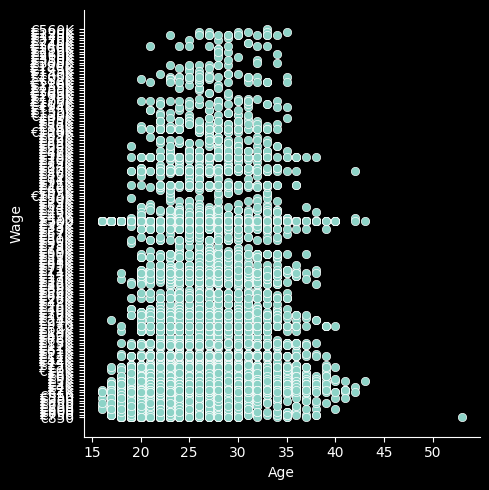

In [45]:
sns.relplot(data=fifa_dt, y="Wage", x="Age")


**-->Heatmap of correlations**

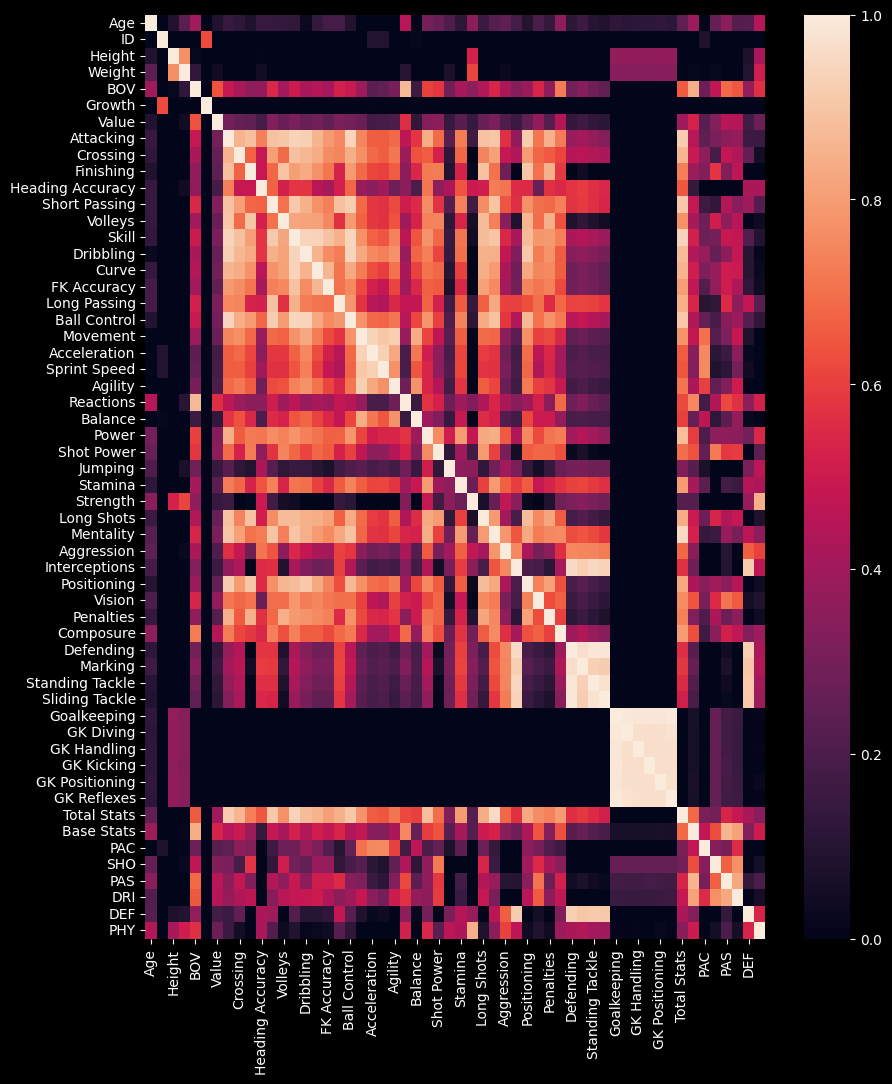

In [46]:
plt.figure(figsize=(10,12))
sns.heatmap(fifa_dt.drop('Wage', axis= 1).corr(numeric_only=True), vmin=0)
plt.show()

It can be seen that a player's value and wage are not much affected by a goalkeeper's statistics, height, or weight. The cause may be that there are other factors to consider while determining the value of a goalkeeper.

The numbers for goalkeepers, on the other hand, are positively correlated with weight and height. The likelihood of someone having better stats increases with height.


**-->AGE DISTRIBUTION**

<Axes: xlabel='Age'>

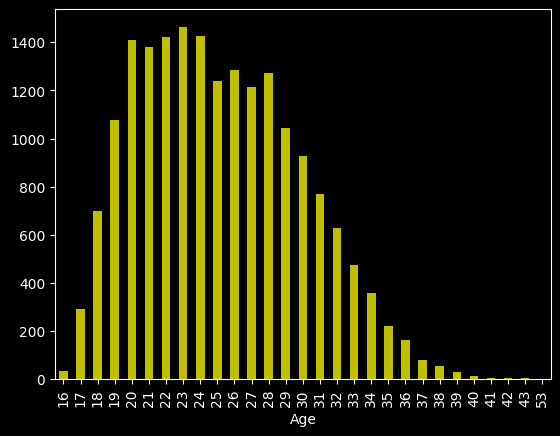

In [95]:
fifa_dt.groupby(['Age']).size().plot(kind='bar', color='y')

**-->COUNTRY-WISE DISTRIBUTION**

<Axes: xlabel='Nationality'>

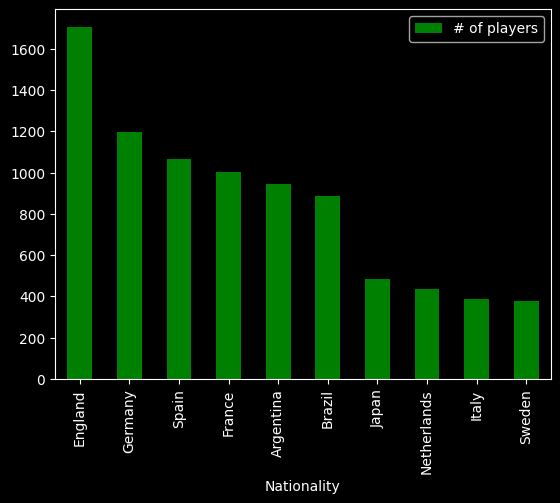

In [92]:
pbn = fifa_dt.groupby(['Nationality']).size().reset_index().sort_values(0,ascending=False)[0:10]
pbn.rename(columns={0:'# of players'},inplace=True)
pbn.plot(x='Nationality',y='# of players',kind='bar',color='g')

In [111]:
fifa_dt[fifa_dt.SM == '5']\
    .loc[:,['Name', 'Nationality', 'Team', 'SM', 'A/W', 'Positions', 'Value', 'Wage']]

,Name,Nationality,Team,SM,A/W,Positions,Value,Wage
1,Cristiano Ronaldo,Portugal,Juventus,5,High,ST LW,46000000,€220K
4,Neymar Jr,Brazil,Germain,5,High,LW CAM,90000000,€270K
6,K. Mbappé,France,Germain,5,High,ST LW RW,105500000,€160K
28,J. Sancho,England,Borussia Dortmund,5,High,RM LM CAM,69500000,€82K
35,Roberto Firmino,Brazil,Liverpool,5,High,CF,52000000,€190K
43,A. Di María,Argentina,Germain,5,High,RW LW,39000000,€160K
52,P. Pogba,France,Manchester United,5,High,CM CDM,50000000,€190K
66,M. Rashford,England,Manchester United,5,High,LM ST,53000000,€150K
74,H. Ziyech,Morocco,Chelsea,5,High,CAM RW,44000000,€140K
77,R. Mahrez,Algeria,Manchester City,5,Medium,RW RM,37500000,€210K


**-->TEAM AND CONTRACT-WISE DISTRIBUTION**

<Axes: xlabel='Team'>

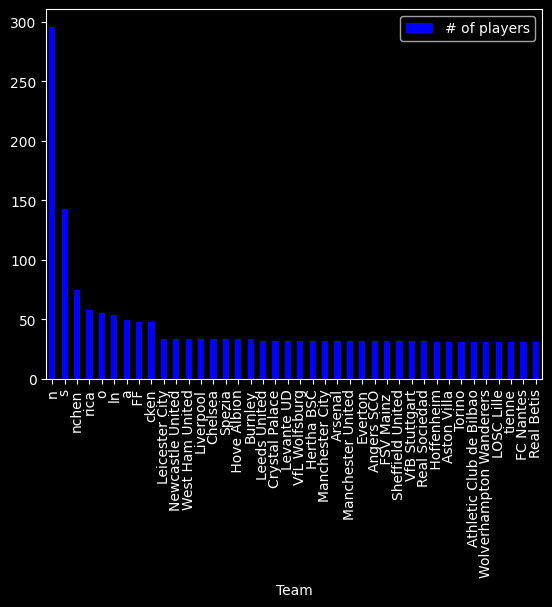

In [109]:
pbt = fifa_dt.groupby(['Team']).size().reset_index().sort_values(0,ascending=False)[0:40]
pbt.rename(columns={0:'# of players'},inplace=True)
pbt.plot(x='Team',y='# of players',kind='bar',color='b')

<Axes: xlabel='Contract'>

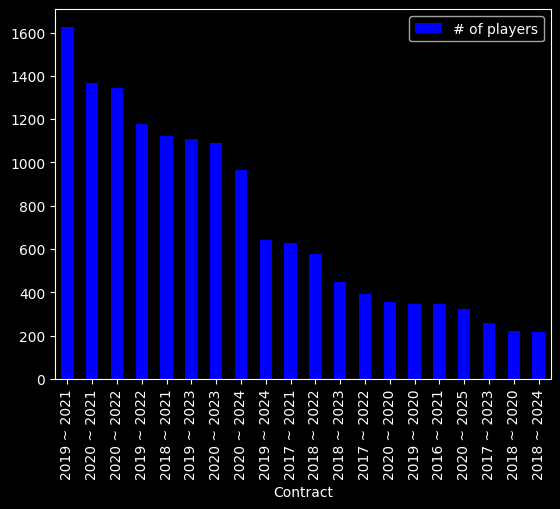

In [99]:
pbc = fifa_dt.groupby(['Contract']).size().reset_index().sort_values(0,ascending=False)[0:20]
pbc.rename(columns={0:'# of players'},inplace=True)
pbc.plot(x='Contract',y='# of players',kind='bar',color='b')

<Axes: xlabel='Wage', ylabel='Value'>

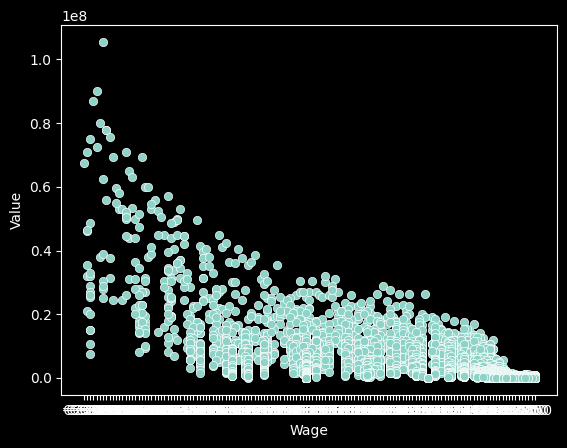

In [86]:
sns.scatterplot(data= fifa_dt, x="Wage", y="Value")

In [82]:
#the top 10 most paid players
most_valued = fifa_dt.nlargest(n=10, columns=['Value'], keep='all')
most_valued[["Value",'Name', 'Nationality', 'Team','PHY']]

,Value,Name,Nationality,Team,PHY
6,105500000,K. Mbappé,France,Germain,76
4,90000000,Neymar Jr,Brazil,Germain,59
3,87000000,K. De Bruyne,Belgium,Manchester City,78
5,80000000,R. Lewandowski,Poland,nchen,82
8,78000000,M. Salah,Egypt,Liverpool,75
9,78000000,S. Mané,Senegal,Liverpool,76
10,75500000,V. van Dijk,Netherlands,Liverpool,86
2,75000000,J. Oblak,Slovenia,tico Madrid,90
22,72500000,R. Sterling,England,Manchester City,67
20,71000000,P. Dybala,Argentina,Juventus,63


In [83]:
#Finding the tallest player
Tallest = fifa_dt.nlargest(n=5, columns=['Height'], keep='all')
Tallest[["Height",'Name', 'Nationality', 'Team','PHY']]

,Height,Name,Nationality,Team,PHY
10305,206,T. Holý,Czech Republic,Ipswich Town,65
4124,203,C. Pantilimon,Romania,Denizlispor,70
6615,203,V. Milinković-Savić,Serbia,Torino,67
8304,203,K. Scherpen,Netherlands,Ajax,66
10905,203,A. Ba,Mauritania,AJ Auxerre,76
11216,203,S. Maierhofer,Austria,dling,74
18191,203,D. Thiam,Senegal,SPAL,61


**-->Checking top Stats**

In [84]:
stats = fifa_dt.nlargest(n=5, columns=['Base Stats', 'Total Stats'], keep='all')
stats[["Base Stats", "Total Stats",'LongName', 'Nationality', 'Team','PHY']]

,Base Stats,Total Stats,LongName,Nationality,Team,PHY
21,498,1534,Ederson Santana de Moraes,Brazil,Manchester City,86
14,497,1515,Manuel Neuer,Germany,nchen,86
7,490,1389,Alisson Ramses Becker,Brazil,Liverpool,91
2,489,1413,Jan Oblak,Slovenia,tico Madrid,90
3,485,2304,Kevin De Bruyne,Belgium,Manchester City,78


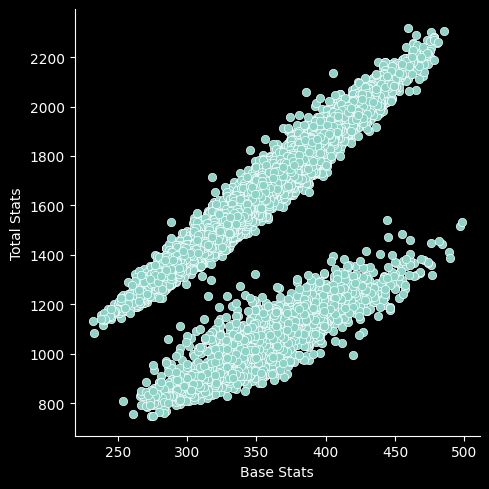

In [85]:
g = sns.relplot(data=fifa_dt, x="Base Stats", y="Total Stats",)